In [608]:
import nltk

In [609]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [610]:
'''
Extend stopwords.words('english') with common whisky jargon based on 1st run of analysis and obtained in
count_vectorizer.get_feature_names
'''
stop = stopwords.words('english') # list
whisky_list = ["whisky", "whiskies","cask", "dram", "note", "notes", "tongue","nose", "taste", "finish", "character","body", "measure", "measures", "measurement","good", "palate", "develop", "box", "boxes",
               "developed", "developing", "linger", "lingering", "hint", "hints","hinted", "hinting", "little", "long", "longer", "longing", "round","dose", "good", "look", "looking", "last", "lasts",
               "lasting", "end", "ends", "ending", "sits", "sitting", "subtle", "subtly", "length", "lengthy", "touch", "gentle", "gently", "follow", "followed", "following", "element", "elements", "happily",
               "overtly","equal", "definite", "balance", "balanced", "year", "aromatic","slightly", "first", "though", "soon", "rather", "make", "yet", "got", "look", "offer", "offers", "sit", "sits", "measure",
               "measurement", "measures", "introduce", "introduces", "introduction", "become", "becomes", "appear", "appears", "appearing", "open", "opening", "way", "upsurge", "amidst", "fore", "etc"]
stop.extend(whisky_list)

In [611]:
#create a preprocessing function
def preprocess(doc):
    #tokenize and filter
    doc_list = [word for word in word_tokenize(doc) if word not in stop] # stopwords.words('english')
    stemmer = PorterStemmer() 
    doc_list = [stemmer.stem(word) for word in doc_list]
    import re
    def replace_all(repls, str):                                   
        return re.sub('|'.join(re.escape(key) for key in repls.keys()),
                  lambda k: repls[k.group(0)], str) 
    doc_list = [replace_all({",": "", "\s": "", "-": "", '.':''}, string) for string in doc_list]
    doc = ' '.join(doc_list)
    return doc

In [612]:
import numpy as np
import pandas as pd

# Import dataframe and prepare for Natural Language Processing and "Best Of" Selection 
df = pd.read_csv('~/Desktop/single_malts/singlemalts/singlemalts_review.csv')
#df.head()
#df.region.unique() # 8 categories
df.distillery.nunique() # 500 scraped whiskies: 120 distilleries, 750 scraped whiskies: 190 distilleries

129

In [613]:
import seaborn as sns

Text(0.5, 1.0, 'Regional Distribution of Whiskies')

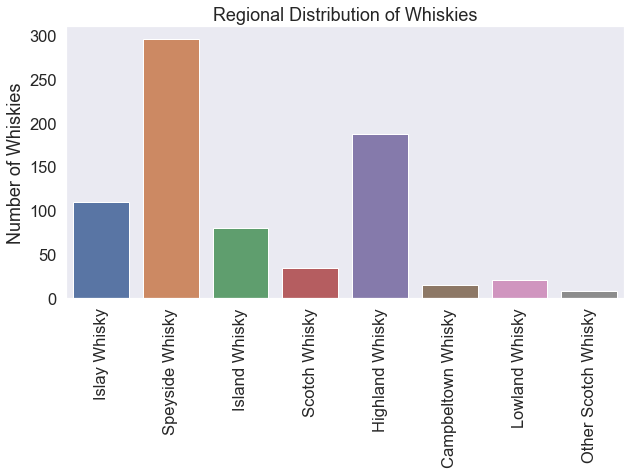

In [614]:
sns.set(style="dark", font_scale =1.5)
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='region'   
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel('')
chart.set_ylabel('Number of Whiskies')
chart.set_title('Regional Distribution of Whiskies')
#chart.to_file("img/number_of_whiskies_per_category.png")

In [615]:
df.loc[df.region == "Island Whisky"] # in this website Island whiskies are all islands (from Arran to Orkney)
df.loc[df.region == "Scotch Whisky"] # strange categories and distilleries 
df.loc[df.region == "Other Scotch Whisky"]# unique special edition? very few. remove 

# Decided to take out the last two categories
df_main = df.loc[~df.region.isin(["Scotch Whisky", "Other Scotch Whisky"])]

Text(0.5, 1.0, 'Distribution of Whiskies by Distillery')

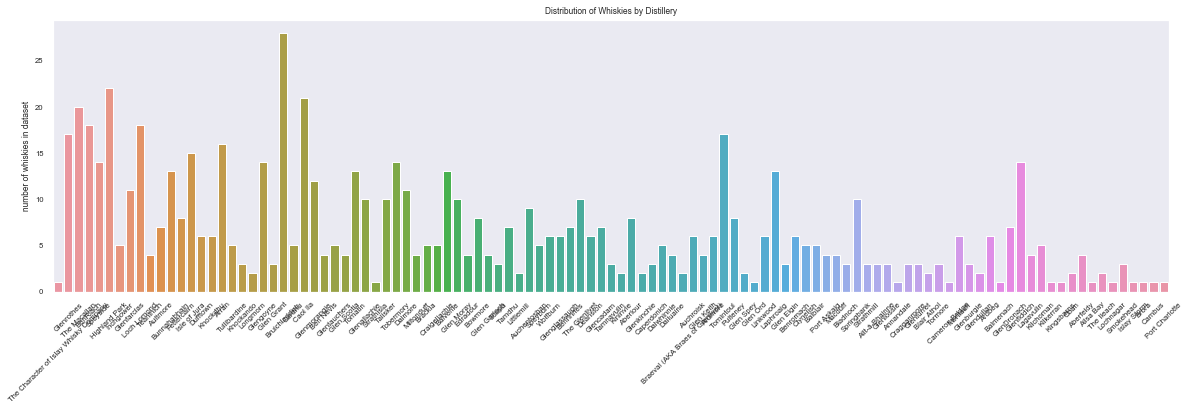

In [616]:
sns.set(style="dark", font_scale =0.7)
plt.figure(figsize=(20,5))
chart = sns.countplot(
    data=df_main,
    x='distillery',
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_xlabel('')
chart.set_ylabel('number of whiskies in dataset')
chart.set_title('Distribution of Whiskies by Distillery')

In [617]:
singlemalts_p = df_main.loc[(~pd.isnull(df_main.price))]
# remove $ sign from price
singlemalts_p.price = singlemalts_p.price.apply(lambda x: x.strip('$'))
# some have two prices, 1st is current discount price, use first
singlemalts_p.price = singlemalts_p.price.apply(lambda x: x.split(',')[0])
# turn into floats
singlemalts_p.price = [float(x) for x in singlemalts_p.price]
print(singlemalts_p.shape) # 728 whiskies with age information
print(singlemalts_p.mean(axis = 0))
print(singlemalts_p.median(axis = 0))

(681, 8)
age                   16.036717
number_of_reviews     28.951743
price                110.605140
rating                 4.158177
dtype: float64
age                  15.00
number_of_reviews     8.00
price                68.36
rating                4.00
dtype: float64


//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0.5, 1.0, 'Distribution of Whiskies by Price')

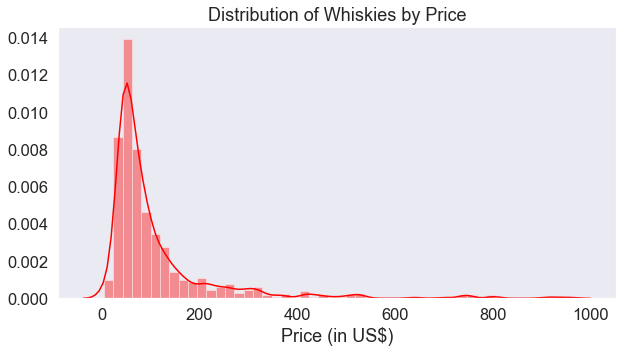

In [618]:
# Price distribution
sns.set(style="dark", font_scale =1.5)
plt.figure(figsize=(10,5))
chart = sns.distplot(singlemalts_p['price'],
                     color="red")
chart.set_xlabel('Price (in US$)')
chart.set_title('Distribution of Whiskies by Price')

In [619]:
# Price by age comparison
singlemalts_a_p = df_main.loc[(~pd.isnull(df_main.price)) & (~pd.isnull(df_main.age))]
# remove $ sign from price
singlemalts_a_p.price = singlemalts_a_p.price.apply(lambda x: x.strip('$'))
# some have two prices, 1st is current discount price, use first
singlemalts_a_p.price = singlemalts_a_p.price.apply(lambda x: x.split(',')[0])
# turn into floats
singlemalts_a_p.price = [float(x) for x in singlemalts_a_p.price]
print(singlemalts_a_p.shape) # 486 whiskies with complete age and price information
print(singlemalts_a_p.mean(axis = 0))
print(singlemalts_a_p.median(axis = 0))
print(singlemalts_a_p.region.describe())

(463, 8)
age                   16.036717
number_of_reviews     35.322727
price                123.773585
rating                 4.218182
dtype: float64
age                  15.0
number_of_reviews     8.0
price                78.9
rating                4.5
dtype: float64
count                 463
unique                  6
top       Speyside Whisky
freq                  208
Name: region, dtype: object


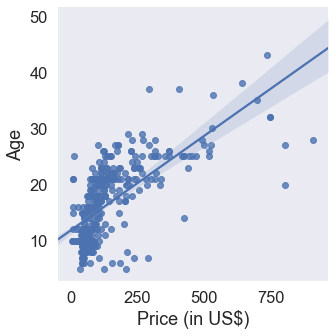

In [620]:
chart = sns.lmplot("price", "age", singlemalts_a_p)
chart.set_axis_labels("Price (in US$)", "Age")

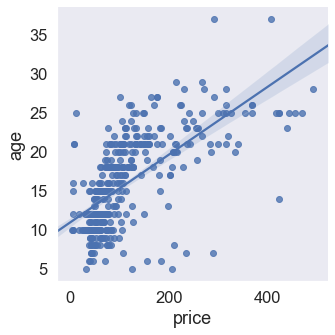

In [621]:
under_500 = singlemalts_a_p[singlemalts_a_p.price <500]
sns.lmplot("price", "age", under_500)

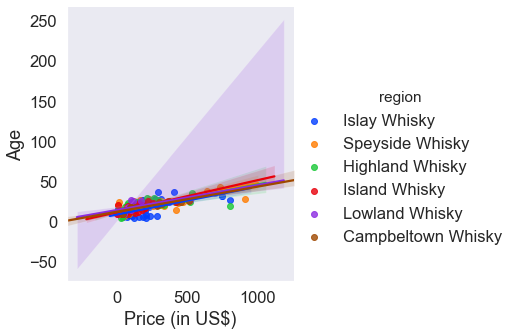

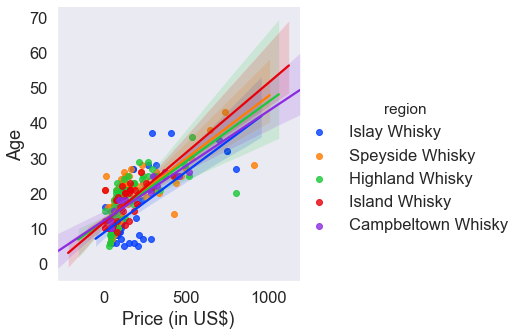

In [622]:
# check by region and higher price
#sns.lmplot("price", "age", singlemalts_a_p, hue="region", palette = "bright")
over_200 = singlemalts_a_p[singlemalts_a_p.price >200]
LLW = over_200[over_200.region == "Lowland Whisky"] # only one Lowland Whisky over £200, remove?

chart = sns.lmplot("price", "age", singlemalts_a_p, hue="region", palette = "bright")
chart.set_axis_labels("Price (in US$)", "Age")

y = singlemalts_a_p.loc[singlemalts_a_p.region != "Lowland Whisky"] # only 1 expensive Lowland Whisky
chart = sns.lmplot("price", "age", y, hue="region", palette = "bright")
chart.set_axis_labels("Price (in US$)", "Age")

In [744]:
'''
Create two dataset. One for language processing; remove items without tasting notes.
Second for user rating. Remove whiskys with no or less than 5 reviews, as rating not very robust and are often unique, rare whiskys.
'''
print(df_main.count())
# all conditions satified gives 210 whiskies from 750 scraped whiskies
singlemalts = df_main.dropna(subset=['tasting_notes'])
singlemalts = singlemalts.loc[(singlemalts.number_of_reviews > 4) & (~pd.isnull(singlemalts.number_of_reviews))]
singlemalts.count()

# 2 separate files, df_tasting_notes with at least 5 user reviews, df_rating with 10 or more user reviews)

singlemalts_tastingnotes = df_main.loc[(df_main.number_of_reviews > 4) & (~pd.isnull(df_main.tasting_notes))] #singlemalts = df.dropna(subset=['tasting_notes'])
print(singlemalts_tastingnotes.count()) # 750 scraped whiskies: 676 whiskies, with review info 202 whiskies!

singlemalts_rating = df_main.loc[(df_main.number_of_reviews > 9) & (~pd.isnull(df_main.number_of_reviews))]
print(singlemalts_rating.count()) # 750 scraped whiskies: 186 whiskies with user ratings 
#singlemalts_rating.distillery.nunique() # 750 scraped whiskies: 69 distilleries; 
#singlemalts_rating.region.unique() # 6 "Other Scotch" is missing; poorly defined category possibly with incomplete ino?

age                  482
distillery           708
name                 708
number_of_reviews    382
price                681
rating               382
region               708
tasting_notes        638
dtype: int64
age                  118
distillery           202
name                 202
number_of_reviews    202
price                199
rating               202
region               202
tasting_notes        202
dtype: int64
age                   96
distillery           156
name                 156
number_of_reviews    156
price                153
rating               156
region               156
tasting_notes        138
dtype: int64


In [650]:
print(singlemalts_rating.count()) # 182!

age                  108
distillery           182
name                 182
number_of_reviews    182
price                178
rating               182
region               182
tasting_notes        160
dtype: int64


In [624]:
# create doc for #tokenizing and filtering from rows
taste_doc = singlemalts_tastingnotes.tasting_notes.tolist()
taste_doc

# preprocess
docs = [preprocess(x) for x in taste_doc]
docs
preprocessed_df = pd.DataFrame(docs,
                  index=singlemalts_tastingnotes.name.tolist())

# pandas dataframe cuts the column width and with this the tasting_notes text to 54 characters!!!!
pd.options.display.max_colwidth = 300

#len(docs[1]) # 178
#print(len(preprocessed_df.loc["Tullibardine 500 Sherry Cask Finish"].to_string())) # before 54, now 178 !!!
#print(preprocessed_df.loc["Tullibardine 500 Sherry Cask Finish"]) # entire string!!! 

In [625]:
'''
Create document term matrix & some additional preprocessing => squeeze out uniform words with max_df, 
require min occurence to be in at least 5% of the dataframe, gives large list, wide resultion, but still
enough similarity based on plt.imshow
'''
count_vectorizer = CountVectorizer(stop)
#count_vectorizer = CountVectorizer(max_df= .9, min_df=.25) # 17 columns
count_vectorizer = CountVectorizer(max_df= .5, min_df=.05)
sparse_matrix = count_vectorizer.fit_transform(docs)

In [626]:
# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df_1 = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=singlemalts_tastingnotes.name.tolist())
print(df_1)
list(df_1.columns)

                                                              allspic  almond  \
Singleton of Dufftown Malt Master's Selection                       0       0   
Tullibardine 500 Sherry Cask Finish                                 0       0   
Glenmorangie Dornoch                                                0       0   
Talisker Storm                                                      0       0   
Royal Brackla 12 Year Old                                           0       1   
Craigellachie 17 Year Old                                           0       0   
Glen Moray Classic Sherry Cask Finish                               0       0   
Bowmore No.1                                                        0       0   
Glen Moray Classic Port Cask Finish                                 0       0   
Inchmurrin 12 Year Old                                              1       0   
Deanston 18 Year Old                                                0       0   
Aberlour A'Bunadh Batch 62  

['allspic',
 'almond',
 'appl',
 'apricot',
 'barley',
 'berri',
 'big',
 'biscuit',
 'black',
 'blossom',
 'brown',
 'butter',
 'butteri',
 'butterscotch',
 'cake',
 'candi',
 'caramel',
 'cereal',
 'chocol',
 'cinnamon',
 'citru',
 'clove',
 'coastal',
 'cocoa',
 'coffe',
 'cream',
 'creami',
 'custard',
 'dark',
 'dri',
 'earthi',
 'espresso',
 'floral',
 'fresh',
 'fruit',
 'fruiti',
 'full',
 'ginger',
 'golden',
 'grass',
 'green',
 'herbal',
 'hint',
 'honey',
 'juici',
 'lemon',
 'light',
 'linger',
 'long',
 'malt',
 'malti',
 'marmalad',
 'medium',
 'milk',
 'mix',
 'nut',
 'nutti',
 'oak',
 'oili',
 'orang',
 'peach',
 'pear',
 'peat',
 'peel',
 'pepper',
 'pepperi',
 'pine',
 'plum',
 'quit',
 'raisin',
 'red',
 'rich',
 'round',
 'salt',
 'sea',
 'sherri',
 'smoke',
 'smoki',
 'soft',
 'spice',
 'spici',
 'sugar',
 'sultana',
 'sweet',
 'syrup',
 'the',
 'there',
 'thick',
 'toast',
 'toffe',
 'vanilla',
 'veri',
 'walnut',
 'warm',
 'white',
 'wood',
 'zest',
 'zesti']

In [627]:
'''
Process. Merge some of the df.columns that provide similar/identical(?) tasting note information:
butter + butteri, cream + creami, malt + malti, fruit + fruiti, nut + nutti, pepper + pepperi, toast + toasti,
smoke + smoki, spice + spici, zest + zesti
''' 
# for min_df=.1
#lis1 = ["cream", "malt", "fruit", "smoke", "spice"]
#lis2 = ["creami", "malti", "fruiti", "smoki", "spici"]

# for min_df=.05
lis1 = ["butter", "cream", "malt", "fruit", "nut", "pepper", "smoke", "spice", "zest"]
lis2 = ["butteri", "creami", "malti", "fruiti", "nutti", "pepperi", "smoki", "spici", "zesti"]

def merge_similar(dataframe, l1, l2):
    for i in range(len(lis1)):
        x = lis1[i]
        y = lis2[i]
        dataframe[x + "_s"] = dataframe[x] + dataframe[y]
        dataframe = dataframe.drop(columns=[x,y])
    return dataframe
       
df_1_aggr = merge_similar(df_1, lis1, lis2)

print(df_1.shape)   
print(df_1_aggr.shape)

(202, 99)
(202, 89)


In [628]:
df_1_aggr.head()

,allspic,almond,appl,apricot,barley,berri,big,biscuit,black,blossom,...,wood,butter_s,cream_s,malt_s,fruit_s,nut_s,pepper_s,smoke_s,spice_s,zest_s
Singleton of Dufftown Malt Master's Selection,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,2,0
Tullibardine 500 Sherry Cask Finish,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,1,0,0,0,2,0
Glenmorangie Dornoch,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,1,0
Talisker Storm,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,2,1,0,0
Royal Brackla 12 Year Old,0,1,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [629]:
#list(df_aggr.columns)

In [630]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cos = cosine_similarity(df_1, df_1)
print(cos)
type(cos)

[[1.         0.27216553 0.21516574 ... 0.25197632 0.05555556 0.1987616 ]
 [0.27216553 1.         0.10540926 ... 0.2057378  0.         0.18257419]
 [0.21516574 0.10540926 1.         ... 0.048795   0.06454972 0.        ]
 ...
 [0.25197632 0.2057378  0.048795   ... 1.         0.25197632 0.16903085]
 [0.05555556 0.         0.06454972 ... 0.25197632 1.         0.        ]
 [0.1987616  0.18257419 0.         ... 0.16903085 0.         1.        ]]


numpy.ndarray

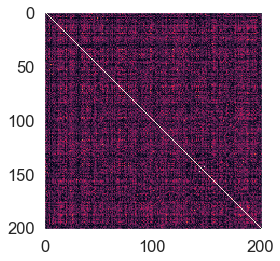

In [631]:
plt.imshow(cosine_similarity(df_1,df_1))

plt.imshow(cosine_similarity(df_1_aggr,df_1_aggr))

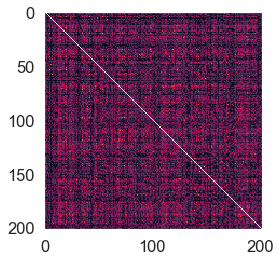

In [632]:
plt.imshow(cosine_similarity(df_1_aggr,df_1_aggr))

In [633]:
cos_aggr = cosine_similarity(df_1_aggr, df_1_aggr)
cos_aggr_sim_df = pd.DataFrame(data=cos_aggr,  # values
                            index= singlemalts_tastingnotes.name.tolist(),
                            columns=singlemalts_tastingnotes.name.tolist())  # 1st row as the column names

In [634]:
cos_aggr_sim_df.head()

,Singleton of Dufftown Malt Master's Selection,Tullibardine 500 Sherry Cask Finish,Glenmorangie Dornoch,Talisker Storm,Royal Brackla 12 Year Old,Craigellachie 17 Year Old,Glen Moray Classic Sherry Cask Finish,Bowmore No.1,Glen Moray Classic Port Cask Finish,Inchmurrin 12 Year Old,...,Tomintoul 10 Year Old,Glenfiddich Reserve Cask 1l,Isle of Jura 10 Year Old,Tomatin Legacy,GlenDronach Peated,Laphroaig Four Oak 1L,Linkwood 12 Year Old - Flora and Fauna,Aberlour A'Bunadh Batch 63,Bunnahabhain An Cladach,Glengoyne 10 Year Old
Singleton of Dufftown Malt Master's Selection,1.000000,0.277350,0.263117,0.217571,0.253185,0.179969,0.059131,0.277350,0.323575,0.350823,...,0.219265,0.299572,0.343203,0.323575,0.236525,0.261488,0.128388,0.219265,0.113228,0.202548
Tullibardine 500 Sherry Cask Finish,0.277350,1.000000,0.158114,0.196116,0.121716,0.162221,0.213201,0.055556,0.277778,0.263523,...,0.158114,0.308607,0.176777,0.000000,0.355335,0.157135,0.102869,0.210819,0.068041,0.182574
Glenmorangie Dornoch,0.263117,0.158114,1.000000,0.062017,0.230940,0.205196,0.134840,0.368932,0.052705,0.350000,...,0.100000,0.146385,0.223607,0.105409,0.067420,0.372678,0.097590,0.150000,0.129099,0.000000
Talisker Storm,0.217571,0.196116,0.062017,1.000000,0.000000,0.318142,0.000000,0.130744,0.196116,0.062017,...,0.124035,0.181568,0.208013,0.196116,0.167248,0.184900,0.181568,0.186052,0.240192,0.143223
Royal Brackla 12 Year Old,0.253185,0.121716,0.230940,0.000000,1.000000,0.177705,0.233550,0.000000,0.182574,0.230940,...,0.115470,0.225374,0.129099,0.121716,0.077850,0.172133,0.225374,0.288675,0.223607,0.066667


In [635]:
Glemorangie = cos_aggr_sim_df.loc[(cos_aggr_sim_df['Glenmorangie The Quinta Ruban 14 Year Old'] > 0.7) & (cos_aggr_sim_df['Glenmorangie The Quinta Ruban 14 Year Old'] < 0.99) ,:]
Glemorangie = Glemorangie['Glenmorangie The Quinta Ruban 14 Year Old']
print(Glemorangie.sort_values(ascending=False)) # no similar whiskies

Cardhu = cos_aggr_sim_df.loc[(cos_aggr_sim_df['Cardhu 12 Year Old'] > 0.7) & (cos_aggr_sim_df['Cardhu 12 Year Old'] < 0.99) ,:]
Cardhu = Cardhu['Cardhu 12 Year Old']
Cardhu.sort_values(ascending=False)


Series([], Name: Glenmorangie The Quinta Ruban 14 Year Old, dtype: float64)


Glenfiddich Experimental Series - Fire & Cane    0.741346
Caol Ila Moch                                    0.730882
Blair Athol 12 Year Old - Flora and Fauna        0.730297
Name: Cardhu 12 Year Old, dtype: float64

In [636]:
Laphroaig = cos_aggr_sim_df.loc[(cos_aggr_sim_df['Laphroaig 10 Year Old'] > 0.5) & (cos_aggr_sim_df['Laphroaig 10 Year Old'] < 0.99) ,:]
Laphroaig = Laphroaig['Laphroaig 10 Year Old']
Laphroaig.sort_values(ascending=False)

Laphroaig Triple Wood    0.577813
Ledaig 10 Year Old       0.550172
Lagavulin 16 Year Old    0.545501
Talisker 18 Year Old     0.539761
Name: Laphroaig 10 Year Old, dtype: float64

In [637]:
Craigellachie = cos_aggr_sim_df.loc[(cos_aggr_sim_df['Craigellachie 17 Year Old'] > 0.6) & (cos_aggr_sim_df['Craigellachie 17 Year Old'] < 0.99) ,:]
Craigellachie = Craigellachie['Craigellachie 17 Year Old']
Craigellachie.sort_values(ascending=False)

Springbank 10 Year Old    0.750939
Glenglassaugh Torfa       0.659269
Talisker Skye             0.657129
Name: Craigellachie 17 Year Old, dtype: float64

In [638]:
mask = (cos_aggr_sim_df > 0.6) # use larger than 0.6! 
i, j = np.where(mask)
print(list(zip(cos_aggr_sim_df.index[i], cos_aggr_sim_df.columns[j])))

[("Singleton of Dufftown Malt Master's Selection", "Singleton of Dufftown Malt Master's Selection"), ('Tullibardine 500 Sherry Cask Finish', 'Tullibardine 500 Sherry Cask Finish'), ('Tullibardine 500 Sherry Cask Finish', 'Glenfarclas 10 Year Old'), ('Tullibardine 500 Sherry Cask Finish', 'Highland Park 18 Year Old (old bottling)'), ('Tullibardine 500 Sherry Cask Finish', 'Highland Park 18 Year Old - Viking Pride'), ('Glenmorangie Dornoch', 'Glenmorangie Dornoch'), ('Glenmorangie Dornoch', 'Laphroaig Select'), ('Talisker Storm', 'Talisker Storm'), ('Royal Brackla 12 Year Old', 'Royal Brackla 12 Year Old'), ('Craigellachie 17 Year Old', 'Craigellachie 17 Year Old'), ('Craigellachie 17 Year Old', 'Talisker Skye'), ('Craigellachie 17 Year Old', 'Glenglassaugh Torfa'), ('Craigellachie 17 Year Old', 'Springbank 10 Year Old'), ('Glen Moray Classic Sherry Cask Finish', 'Glen Moray Classic Sherry Cask Finish'), ('Glen Moray Classic Sherry Cask Finish', 'The Macallan Quest (1L)'), ('Bowmore No.1

0    appl crumbl  melon raisin  honey 'd barley  smoke vanilla icecream   It open sweet pineappl custard cream  meati shine  more smoke  clove oak   waxi smoki 


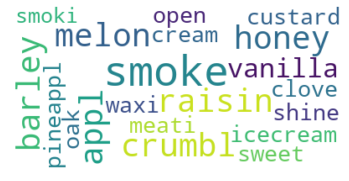

In [598]:
# Start with one tasting_notes_review:

from wordcloud import WordCloud, STOPWORDS 
preprocessed_df.head()
preprocessed_df.loc["Craigellachie 17 Year Old"]
string= preprocessed_df.loc["Craigellachie 17 Year Old"].to_string()
print(string)

#Create and generate a word cloud image:
wordcloud = WordCloud().generate(string)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(string)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

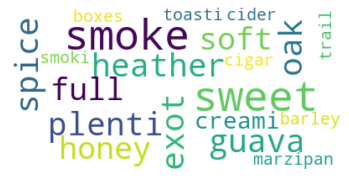

In [599]:
# Start with one review:

#string_2 = df_aggr.loc[df_aggr.name == "Springbank 10 Year Old"]['tasting_notes'].to_string()
string_2= preprocessed_df.loc["Springbank 10 Year Old"].to_string()
len(string_2)
#Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(string_2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("img/Springbank_10_year.png")

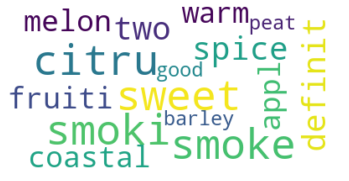

In [600]:
# Start with one review:

#string_2 = df_aggr.loc[df_aggr.name == "Springbank 10 Year Old"]['tasting_notes'].to_string()
string_3= preprocessed_df.loc["Glenglassaugh Torfa"].to_string()
len(string_3)
#Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(string_3)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

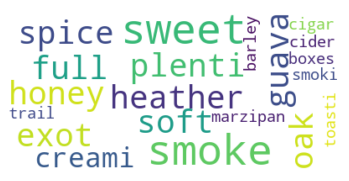

In [639]:
#string_2 = df_aggr.loc[df_aggr.name == "Springbank 10 Year Old"]['tasting_notes'].to_string()
string_2= preprocessed_df.loc["Springbank 10 Year Old"].to_string()
len(string_2)
#Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(string_2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("img/Springbank_10_year.png")

In [640]:
test = cos_aggr_sim_df.loc[cos_aggr_sim_df['Laphroaig 10 Year Old'] > 0.5,:]
test

,Singleton of Dufftown Malt Master's Selection,Tullibardine 500 Sherry Cask Finish,Glenmorangie Dornoch,Talisker Storm,Royal Brackla 12 Year Old,Craigellachie 17 Year Old,Glen Moray Classic Sherry Cask Finish,Bowmore No.1,Glen Moray Classic Port Cask Finish,Inchmurrin 12 Year Old,...,Tomintoul 10 Year Old,Glenfiddich Reserve Cask 1l,Isle of Jura 10 Year Old,Tomatin Legacy,GlenDronach Peated,Laphroaig Four Oak 1L,Linkwood 12 Year Old - Flora and Fauna,Aberlour A'Bunadh Batch 63,Bunnahabhain An Cladach,Glengoyne 10 Year Old
Talisker 18 Year Old,0.401363,0.255377,0.349948,0.434057,0.124334,0.276184,0.036298,0.198627,0.227002,0.188434,...,0.161515,0.367785,0.240772,0.227002,0.145191,0.280900,0.105081,0.107676,0.208514,0.093250
Lagavulin 16 Year Old,0.413585,0.344124,0.326464,0.179969,0.125656,0.372161,0.048912,0.420596,0.229416,0.290191,...,0.253917,0.424795,0.243332,0.497067,0.244558,0.378517,0.070799,0.217643,0.234146,0.376969
Ledaig 10 Year Old,0.275654,0.184053,0.453980,0.346518,0.120972,0.394116,0.047088,0.294484,0.147242,0.244451,...,0.314294,0.238559,0.390434,0.184053,0.235441,0.572637,0.272639,0.209529,0.270501,0.161296
Laphroaig 10 Year Old,0.314037,0.226455,0.322252,0.310881,0.124035,0.330623,0.000000,0.301941,0.226455,0.214834,...,0.214834,0.244600,0.320256,0.150970,0.193122,0.373632,0.069886,0.107417,0.184900,0.206725
Laphroaig Triple Wood,0.509525,0.238145,0.290474,0.200160,0.111803,0.298020,0.000000,0.272166,0.204124,0.225924,...,0.129099,0.283473,0.396928,0.170103,0.304636,0.433013,0.283473,0.258199,0.250000,0.074536


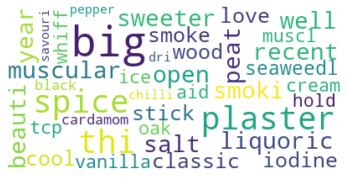

In [641]:
string_Laphroig = preprocessed_df.loc["Laphroaig 10 Year Old"].to_string()
len(string_Laphroig)
#Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(string_Laphroig)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

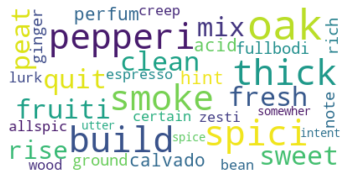

In [642]:
string_Talikser = preprocessed_df.loc["Talisker 18 Year Old"].to_string()
string_Talikser
#Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(string_Talikser)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

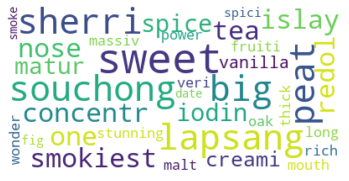

In [643]:
string_Lagavulin = preprocessed_df.loc["Lagavulin 16 Year Old"].to_string()
string_Lagavulin
#Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(string_Lagavulin)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [674]:
#wine_mask = np.array(Image.open("img/wine_mask_xgk1tq.png"))

In [748]:
#Obtain 5 highest rated whiskies with 10 or more nr of reviews of the same region
Craigellachie_rr = singlemalts_rating[singlemalts_rating.name =='Craigellachie 17 Year Old'][['price', 'region']]
Craigellachie_rr

# make interactive in the future, currently hardcoded
top5_Craigellachie = singlemalts_rating[singlemalts_rating.region == "Speyside Whisky"].sort_values(by=['rating'], ascending = False).head()
top5_Craigellachie = top5_Craigellachie[["name", "rating", "number_of_reviews", "price"]]
top5_Craigellachie.number_of_reviews = top5_Craigellachie.number_of_reviews.astype(int)

#top5_Craigellachie.save(path)
top5_Craigellachie.to_csv("top5_Craigellachie.csv", index=False)

top5_Craigellachie

,name,rating,number_of_reviews,price
485,Dailuaine 16 Year Old - Flora and Fauna,4.5,16,$63.34
420,Balvenie 14 Year Old Caribbean Cask,4.5,189,$53.40
533,Tamdhu 10 Year Old,4.5,32,$36.24
670,The Glenlivet 18 Year Old,4.5,96,$96.10
186,Tomintoul 14 Year Old,4.5,15,$48.78


In [749]:
#Obtain 5 highest rated whiskies with 15 or more nr of reviews of the same region
singlemalts_rating_15 = singlemalts_rating.loc[singlemalts_rating.number_of_reviews > 14]

# make interactive in the future, currently hardcoded
top5_15_Craigellachie = singlemalts_rating_15[singlemalts_rating_15.region == "Speyside Whisky"].sort_values(by=['rating'], ascending = False).head()
top5_15_Craigellachie = top5_Craigellachie[["name", "rating", "number_of_reviews", "price"]]
top5_15_Craigellachie.number_of_reviews = top5_Craigellachie.number_of_reviews.astype(int)

#top5_Craigellachie.save(path)
top5_15_Craigellachie.to_csv("top5_15_Craigellachie.csv", index=False)

top5_15_Craigellachie


,name,rating,number_of_reviews,price
485,Dailuaine 16 Year Old - Flora and Fauna,4.5,16,$63.34
420,Balvenie 14 Year Old Caribbean Cask,4.5,189,$53.40
533,Tamdhu 10 Year Old,4.5,32,$36.24
670,The Glenlivet 18 Year Old,4.5,96,$96.10
186,Tomintoul 14 Year Old,4.5,15,$48.78


In [715]:
# To start interactive tools, select from the following whiskies"
'''
'Caol Ila Moch', 'Cardhu 12 Year Old', 'Craigellachie 17 Year Old','Glenglassaugh Torfa', 'Glenmorangie 10 Year Old - The Original', 'Speyburn 10 Year Old',
'Springbank 10 Year Old', 
'''

"\n'Caol Ila Moch', 'Cardhu 12 Year Old', 'Craigellachie 17 Year Old','Glenglassaugh Torfa', 'Glenmorangie 10 Year Old - The Original', 'Speyburn 10 Year Old',\n'Springbank 10 Year Old', \n"